<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [21]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2022-05-16 21:27:50--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  1.11MB/s    in 32s     

2022-05-16 21:28:22 (1.11 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



Connect to the database.


In [22]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Demo: How to run an sql query


In [24]:
df = pd.read_sql_query("select * from master",conn)
df.head()

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy


## Demo: How to list all tables


In [16]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [17]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [18]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


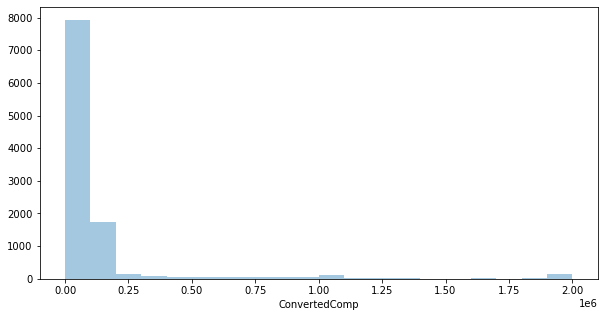

In [25]:
plt.figure(figsize=(10,5))
sns.distplot(a=df["ConvertedComp"],bins=20,kde=False)
plt.show()

### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:>

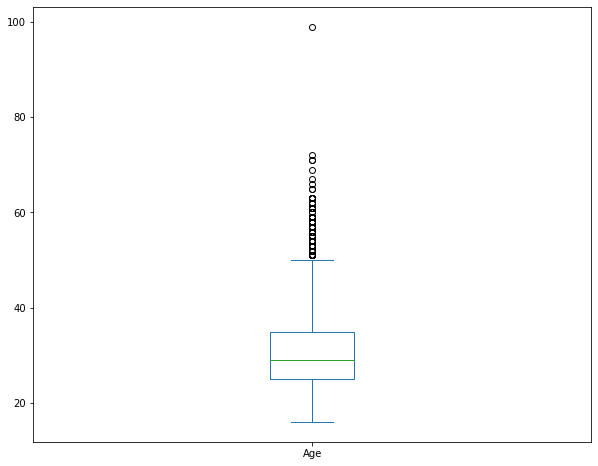

In [31]:
Query2 = """
SELECT Age 
FROM master
"""

Age= pd.read_sql_query(Query2, conn)
Age.plot(kind='box', figsize=(10, 8))


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


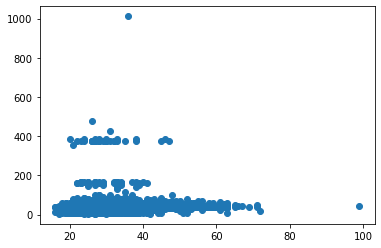

In [30]:
Query3= """
SELECT Age
FROM master
"""
Query4= """
SELECT WorkWeekHrs
FROM master
"""

Query5="""
SELECT Age, WorkWeekHrs
FROM master
"""
Age=pd.read_sql_query(Query3, conn)
WorkWeekHrs= pd.read_sql_query(Query4, conn)
Age_WorkWeekHrs=pd.read_sql_query(Query5, conn)
plt.scatter(x=Age, y=WorkWeekHrs)

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


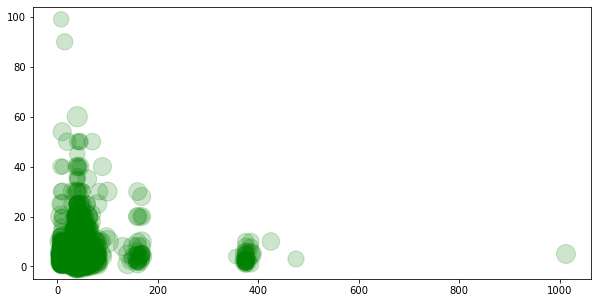

In [12]:
plt.figure(figsize=(10,5))
plt.scatter(x=df.WorkWeekHrs, y=df.CodeRevHrs, c='green', alpha=0.2, s=df.Age*10)
plt.show()


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


([<matplotlib.patches.Wedge at 0x7ff86f414650>,
 [Text(1.1736914154044327, 1.1597191303957783, 'PostgreSQL'),
  Text(-0.9921837807065633, 1.3183593384592953, 'MongoDB'),
  Text(-1.5602426637717488, -0.536789372236856, 'Redis'),
  Text(-0.08034500476514456, -1.6480426815496283, 'MySQL'),
  Text(1.4365316698453372, -0.8117122405947613, 'Elasticsearch')],
 [Text(0.6401953174933268, 0.6325740711249699, '24.8%'),
  Text(-0.5411911531126707, 0.71910509370507, '20.9%'),
  Text(-0.8510414529664083, -0.292794203038285, '19.1%'),
  Text(-0.043824548053715204, -0.8989323717543425, '18.8%'),
  Text(0.7835627290065474, -0.4427521312335061, '16.4%')])

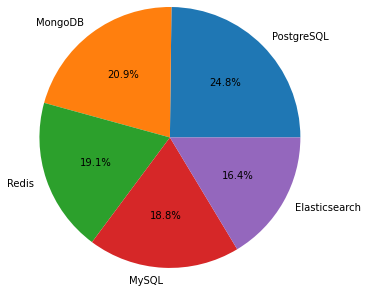

In [26]:
Query7="""
SELECT DatabaseDesireNextYear, count(*) as count
FROM DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by count desc limit 5
"""

DatabaseDesireNextYear= pd.read_sql_query(Query7, conn)
x = DatabaseDesireNextYear['count']
label = DatabaseDesireNextYear['DatabaseDesireNextYear']
plt.pie(x, labels=label, autopct='%1.1f%%',radius=1.5)

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


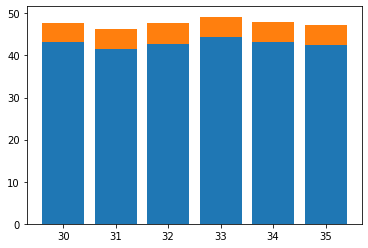

In [27]:
Query8 = """
SELECT Avg(WorkWeekHrs), Avg(CodeRevHrs), Age 
FROM master 
where Age between 30 and 35
group by Age
"""

z = pd.read_sql_query(Query8, conn)
WorkWeekHrs= z['Avg(WorkWeekHrs)']
CodeRevHrs= z['Avg(CodeRevHrs)']
Age= z['Age']

fig, ax = plt.subplots()

ax.bar(Age, WorkWeekHrs, label='WorkWeekHrs')
ax.bar(Age, CodeRevHrs, bottom=WorkWeekHrs,
       label='CodeRevHrs')

plt.show()



## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


    Avg(ConvertedComp)   Age
0        187374.012821  45.0
1        231703.737705  46.0
2        142093.126984  47.0
3        157251.532258  48.0
4        214709.000000  49.0
5        143120.464286  50.0
6        123404.666667  51.0
7        255217.236842  52.0
8        257196.758621  53.0
9        144287.041667  54.0
10       150508.583333  55.0
11       107843.357143  56.0
12       127548.700000  57.0
13       332839.833333  58.0
14       350231.800000  59.0
15       132287.500000  60.0


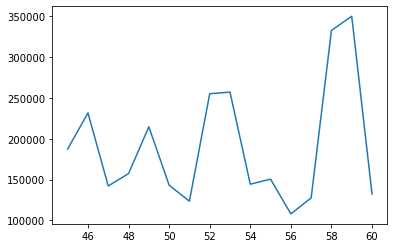

In [28]:
Query9= """
SELECT Avg(ConvertedComp), Age
FROM master
where age between 45 and 60
group by Age
"""
ConvertedComp_Age= pd.read_sql_query(Query9, conn)
ConvertedComp_Age
plt.plot(ConvertedComp_Age['Age'],ConvertedComp_Age['Avg(ConvertedComp)'])
print(ConvertedComp_Age)


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


,MainBranch,count(*)
0,I am a developer by profession,10618
1,"I am not primarily a developer, but I write co...",780


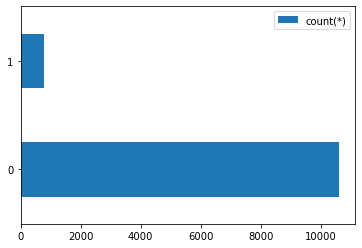

In [29]:
Query10="""
SELECT MainBranch, count(*)
FROM master
group by MainBranch
"""
MainBranch=pd.read_sql_query(Query10, conn)
MainBranch.plot(kind='barh')
MainBranch



Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
